# Bank Data Analysis

# Objective

In this case study, you will be working on Banking Data Analysis using Apache Spark, a powerful distributed computing framework designed for big data processing. This assignment aims to give you hands-on experience in analyzing large-scale banking datasets using PySpark and AWS services. You will apply techniques learned in data analytics to clean, transform, and explore banking data, drawing meaningful insights to support financial decision-making. Apart from understanding how big data tools can optimize performance on a single machine and across clusters, you will develop a structured approach to analyzing market capitalization trends, currency conversions, and global banking performance. Additionally, you will use AWS S3 to store the processed data once the ETL pipeline is complete, ensuring efficient data management and retrieval.


# Business Value

The banking industry operates in a highly competitive and globalized market where financial institutions must continuously monitor their market position, performance, and currency fluctuations. To stay competitive, banks must leverage data-driven insights to optimize their financial strategies, assess market trends, and make informed decisions. In this assignment, you will analyze banking data to uncover patterns in market capitalization, currency conversions, and global rankings. With Apache Spark's ability to handle large datasets efficiently, financial institutions can process vast amounts of data in real-time, helping them make faster and more informed decisions.


As an analyst at a financial institution, your task is to examine historical banking data to derive actionable insights that can drive strategic growth. Your analysis will help identify the top 10 largest banks by market capitalization, convert market cap values into multiple currencies (USD, GBP, EUR, INR), and store the processed data for easy retrieval. To enhance scalability and accessibility, you will utilize AWS S3 for data storage, ensuring seamless integration with cloud-based analytics tools. By leveraging big data analytics and cloud services, financial institutions can streamline operations, enhance decision-making, and maximize revenue opportunities.


# Dataset

The data for this project can be accessed from the following [wikipedia link](https://web.archive.org/web/20230908091635/https://en.wikipedia.org/wiki/List_of_largest_banks).

The dataset used in this analysis comprises global banking data extracted from a Wikipedia page (List of Largest Banks) archived as of September 2023.

It includes rankings of the world's largest banks based on market capitalization (in USD billions) and is structured into a single table with three columns. The data was scraped programmatically, cleaned, and transformed using PySpark to support cross-currency analysis. Exchange rate data (for USD, GBP, EUR, and INR) was sourced from a CSV file to enable currency conversions. The processed dataset is stored in CSV and SQLite formats for accessibility and efficient querying.

The dataset consists of a single table (Largest_banks) with the following three key attributes:
- **Rank:** Numerical position of the bank based on market capitalization.
- **Bank Name:** Name of the financial institution.
- **Market Cap (USD Billion):** Market valuation of the bank in USD billions.
This dataset enables analysis of global banking trends, cross-currency valuations, and the relative market dominance of financial institutions.

An additional data on market exchange rates is available to compare the marketcap dealing with different currencies.


<h2>Assignment Tasks</h2>

<ol>
    <li>
        <strong>Data Preparation</strong>
        <p>The dataset consists of a structured table containing global banking data. Before performing any analysis, it is crucial to prepare the data to ensure consistency and efficiency in processing.</p>
        Check for data consistency and ensure all columns are correctly formatted.<br>
        Structure and prepare the data for further processing and analysis.<br>
</br>
    <li>
        <strong>Data Cleaning</strong>
        <ul>
            2.1. <strong>Handling Missing Values:</strong> Decide on an approach to handle missing data (e.g., imputation or removal). Mention the approach in your report.<br>
            2.2. <strong>Fixing Columns:</strong> Ensure all columns are properly named and formatted.<br>
            2.3. <strong>Handling Outliers:</strong> Identify outliers in the dataset and explain why they are considered outliers. It is not necessary to remove them for this task, but mention your approach for handling them.<br>
        </ul>
</br>
    <li>
        <strong>Exploratory Data Analysis:</strong></br>
            EDA Finding Patterns - Analyze the dataset and find patterns based on the following points:
                <ul>
                    3.1. Convert PySpark DataFrame to Pandas DataFrame for visualization.<br>
                    3.2. Analyze the distribution of market capitalization using a histogram.<br>
                    3.3. Identify the top 10 banks by market capitalization using a bar chart.<br>
                    3.4. Visualize the relationship between market capitalization and bank ranking using a scatter plot.<br>
                    3.5. Use a boxplot to examine the spread and outliers in market capitalization.<br>
                    3.6. Display the quartile distribution of market capitalization using a violin plot.<br>
                    3.7. Compute cumulative market share and visualize it with a line plot.<br>
                    3.8. Categorize banks into market capitalization ranges and analyze their distribution using a bar chart.<br>
                    3.9. Calculate and display market share distribution of top 10 banks using a pie chart.<br>
                </ul>
        </ul>
</br>
    <li>
        <strong>Banking Data ETL Querying</strong>
        <ul>
            4.1. Perform Advanced Market Capitalization Analysis with Growth Metrics.<br>
            4.2. Analyze Market Concentration and Categorize Banks Based on Market Share Tiers.<br>
            4.3. Examine Statistical Distribution of Market Capitalization Using Quartile Analysis.<br>
            4.4. Conduct Comparative Size Analysis to Classify Banks by Relative Market Size.<br>
            4.5. Evaluate Market Growth and Identify Gaps Between Consecutive Banks.<br>
            4.6. Assess Market Dominance by Measuring Cumulative Share and Dominance Score.<br>
            4.7. Analyze Segment-Wise Bank Performance Based on Market Capitalization Ranges.<br>
            4.8. Generate a Comprehensive Performance Dashboard for Bank Rankings and Metrics.<br>
        </ul>
    </br>
    <li>
        <strong>Conclusion</strong></br>
            Provide final insights and recommendations based on the analysis:</br>
            <ul>
            5.1 Recommendations to track and compare market capitalisation of the top global banks toevaluate competitiveness and dominance.</br>
            5.2 Suggestions to use cross-currency analysis (USD, GBP, EUR, INR) for consistent benchmarking
of financial institutions across regions.</br>
            5.3 Propose continuous monitoring of market share concentration to identify growth opportunities
for mid-tier banks.</br>
            5.4  Identify potential regions or banking segments for expansion by analysing gaps between tiers
of banks and regional trends.</br>
            </ul>
    </br>
    <li>
        <strong>Visualization Integration [Optional]</strong>
        <p>Enhance the project by incorporating a visualization component that connects the processed data stored in an S3 bucket to a business intelligence tool such as Tableau or Power BI. This involves setting up the connection between the S3 bucket and the chosen visualization tool, importing the processed dataset for analysis and visualization, creating interactive dashboards to explore key trends and insights and ensuring data updates are reflected dynamically in the visualization tool.<br>
        </ul>
</ol>

Import Required Libraries

In [50]:
# # Install the required libraries
# !pip install --quiet pyspark==3.5.4 pandas==2.2.2

In [51]:
# Import required libraries
import logging
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# Import PySpark libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, round, count, when, isnull
from pyspark.sql import SparkSession, functions as F, types as T

In [52]:
# Initialize Spark session

from databricks.connect import DatabricksSession
spark = DatabricksSession.builder.serverless().getOrCreate()

#**1. Data Preparation** <font color = red>[5 marks]</font> <br>


The data for this project can be accessed from the wikipedia link provided above. The page features data regarding global banking data.

Utilise the pandas method to read tables from the html document
and extract the requried data consists of a structured format.

Before performing any analysis, it is crucial to prepare the data to ensure consistency, and efficiency in processing.

In [53]:
# Initialize Spark session

# URL of the Wikipedia page
wiki_url = "https://web.archive.org/web/20230908091635/https://en.wikipedia.org/wiki/List_of_largest_banks"
# Use pandas to read all HTML tables from the page
tables = pd.read_html(wiki_url)
# Load the correct table (Table 1)
table_idx = None
for i, t in enumerate(tables):
    cols = " ".join([str(c).lower() for c in t.columns])
    if "market" in cols or "market cap" in cols or "market capitalization" in cols:
        table_idx = i
        break
if table_idx is None:
    # fallback
    table_idx = 0

df_raw = tables[table_idx].copy()
print("Using table index:", table_idx)
df_raw.head(5)
# Convert pandas DataFrame to PySpark DataFrame
raw_spark_df = spark.createDataFrame(df_raw)
# Rename columns
renamed_spark_df = raw_spark_df \
    .withColumnRenamed("Bank name", "BankName") \
    .withColumnRenamed("Market cap (US$ billion)", "MarketCap_USD_Billion")

schema_df = renamed_spark_df.withColumn("Rank", F.col("Rank").cast(T.IntegerType())) \
    .withColumn("MarketCap_USD_Billion", F.col("MarketCap_USD_Billion").cast(T.DoubleType()))

spark_df = schema_df.select("Rank", "BankName", "MarketCap_USD_Billion")
# Show the first few rows of the PySpark DataFrame
spark_df.printSchema()
# Print the schema of the DataFrame
spark_df.show(5, truncate=False)
# Configure logging


Using table index: 1
root
 |-- Rank: integer (nullable = true)
 |-- BankName: string (nullable = true)
 |-- MarketCap_USD_Billion: double (nullable = true)

+----+---------------------------------------+---------------------+
|Rank|BankName                               |MarketCap_USD_Billion|
+----+---------------------------------------+---------------------+
|1   |JPMorgan Chase                         |432.92               |
|2   |Bank of America                        |231.52               |
|3   |Industrial and Commercial Bank of China|194.56               |
|4   |Agricultural Bank of China             |160.68               |
|5   |HDFC Bank                              |157.91               |
+----+---------------------------------------+---------------------+
only showing top 5 rows


Load the data for exchange rates

In [54]:
# Load the exchange rate data
exchange_rates_csv_path = "exchange_rate.xlsx"
try:
    exch_pd = pd.read_excel(exchange_rates_csv_path)
except Exception as e:
    print("Failed to read exchange_rates.csv:", e)

# Show the first few rows of the exchange rate data to verify
exch_pd

,Currency,Rate
0,EUR,0.93
1,GBP,0.80
2,INR,82.95


#**2. Data Cleaning** <font color = red>[20 marks]</font> <br>

##**2.1 Handle Missing Values** <font color = red>[10 marks]</font> <br>


In [55]:
# Print the schema to check data types
spark_df.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- BankName: string (nullable = true)
 |-- MarketCap_USD_Billion: double (nullable = true)



In [56]:
# Check for missing values
missing_counts = {c: spark_df.filter(F.col(c).isNull()).count() for c in spark_df.columns}
print("Missing counts:", missing_counts)

Missing counts: {'Rank': 0, 'BankName': 0, 'MarketCap_USD_Billion': 0}


In [57]:
# Drop rows with missing values
clean_df = spark_df.na.drop(subset=["BankName", "MarketCap_USD_Billion"])

# Verify that no missing values remain
clean_df.select([
    F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in clean_df.columns
]).show()

+----+--------+---------------------+
|Rank|BankName|MarketCap_USD_Billion|
+----+--------+---------------------+
|   0|       0|                    0|
+----+--------+---------------------+



##**2.2 Fixing Columns** <font color = red>[5 marks]</font> <br>


The Market cap is already in numeric so no conversion needed.

In [58]:
# Count the total number of rows
total_rows = clean_df.count()

print(f"✅ Total number of valid rows after cleaning: {total_rows}")
# Check if there are duplicates

duplicate_count = clean_df.groupBy("BankName").count().filter(F.col("count") > 1).count()
print(f"🔍 Number of duplicate bank names: {duplicate_count}")

duplicate_count_usd = clean_df.groupBy("MarketCap_USD_Billion").count().filter(F.col("count") > 1).count()
print(f"🔍 Number of duplicate MarketCap_USD_Billion: {duplicate_count_usd}")

✅ Total number of valid rows after cleaning: 10
🔍 Number of duplicate bank names: 0
🔍 Number of duplicate MarketCap_USD_Billion: 0


##**2.2 Handle Outliers** <font color = red>[5 marks]</font> <br>


In [59]:
# Write code for outlier analysis

quantiles = clean_df.approxQuantile("MarketCap_USD_Billion", [0.25, 0.75], 0.05)
q1, q3 = quantiles
iqr = q3 - q1

# Calculate lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Q1 = {q1:.2f}, Q3 = {q3:.2f}, IQR = {iqr:.2f}")
print(f"Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")

outliers_df = clean_df.filter(
    (F.col("MarketCap_USD_Billion") < lower_bound) |
    (F.col("MarketCap_USD_Billion") > upper_bound)
)

print(f"Number of potential outliers: {outliers_df.count()}")
outliers_df.select("Rank", "BankName", "MarketCap_USD_Billion").show(truncate=False)

Q1 = 140.83, Q3 = 194.56, IQR = 53.73
Lower Bound = 60.24, Upper Bound = 275.15
Number of potential outliers: 1
+----+--------------+---------------------+
|Rank|BankName      |MarketCap_USD_Billion|
+----+--------------+---------------------+
|1   |JPMorgan Chase|432.92               |
+----+--------------+---------------------+



Saving the Cleaned Dataset into a CSV File into the S3 Bucket


#**3. Exploratory Data Analysis** <font color = red>[40 marks]</font> <br>


##**3.1. Conversion from PySpark to Pandas DataFrame** <font color = red>[5 marks]</font> <br>

Convert PySpark DataFrame to Pandas DataFrame for visualization

In [60]:
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = spark_df.toPandas().sort_values(by="MarketCap_USD_Billion", ascending=False).reset_index(drop=True)
pandas_df.head(10)

,Rank,BankName,MarketCap_USD_Billion
0,1,JPMorgan Chase,432.92
1,2,Bank of America,231.52
2,3,Industrial and Commercial Bank of China,194.56
3,4,Agricultural Bank of China,160.68
4,5,HDFC Bank,157.91
5,6,Wells Fargo,155.87
6,7,HSBC Holdings PLC,148.90
7,8,Morgan Stanley,140.83
8,9,China Construction Bank,139.82
9,10,Bank of China,136.81


##**3.2. Market Capitalization** <font color = red>[5 marks]</font> <br>

Analyze the distribution of market capitalization using a histogram

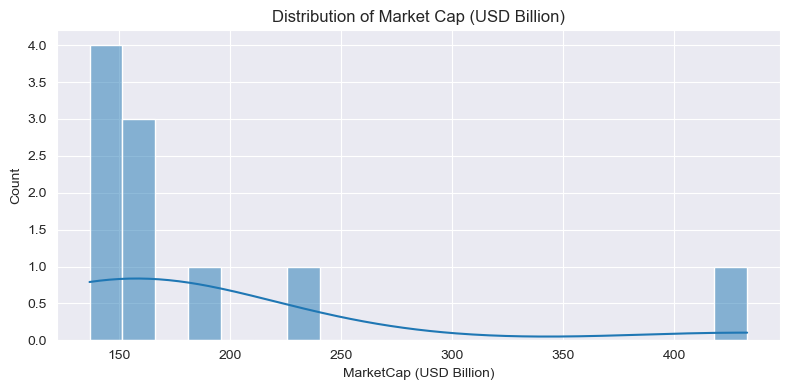

In [61]:
# Distribution of Market Cap (US$ Billion)

# Set the style for seaborn

# Plot the distribution of market cap

plt.figure(figsize=(8,4))
sns.histplot(pandas_df["MarketCap_USD_Billion"], bins=20, kde=True)
plt.title("Distribution of Market Cap (USD Billion)")
plt.xlabel("MarketCap (USD Billion)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

##**3.3. Top 10 Banks** <font color = red>[5 Marks]</font> <br>

Identify the top 10 banks by market capitalization using a bar chart

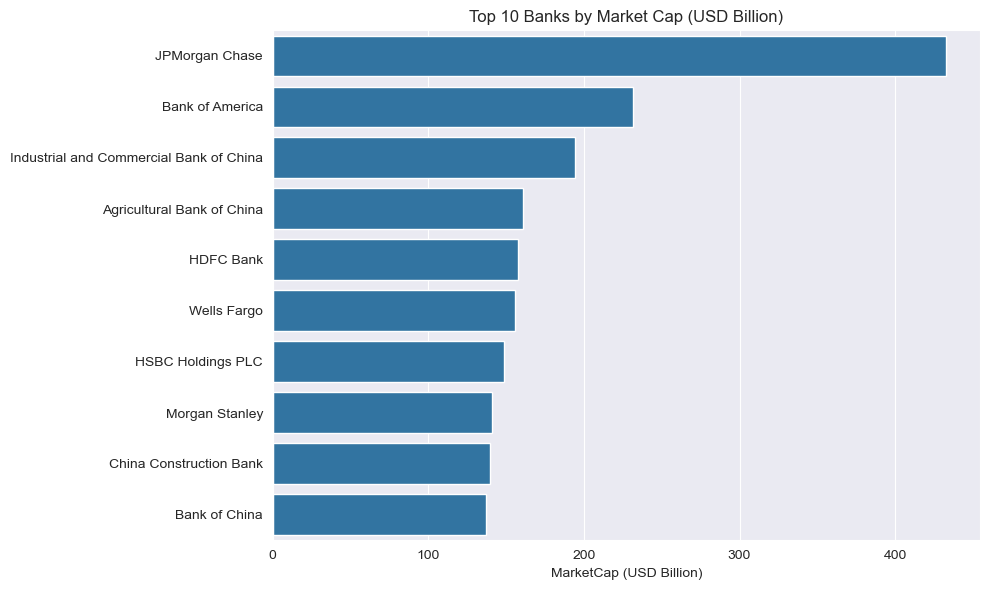

In [62]:
# Top 10 Banks by Market Cap

# Sort the DataFrame by market cap in descending order

# Plot the top 10 banks by market cap

top10 = pandas_df.head(10).copy()
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x="MarketCap_USD_Billion", y="BankName")
plt.title("Top 10 Banks by Market Cap (USD Billion)")
plt.xlabel("MarketCap (USD Billion)")
plt.ylabel("")
plt.tight_layout()
plt.show()

##**3.4. Market Cap vs Bank Ranking** <font color = red>[5 Marks]</font> <br>

Visualize the relationship between market capitalization and bank ranking using a scatter plot

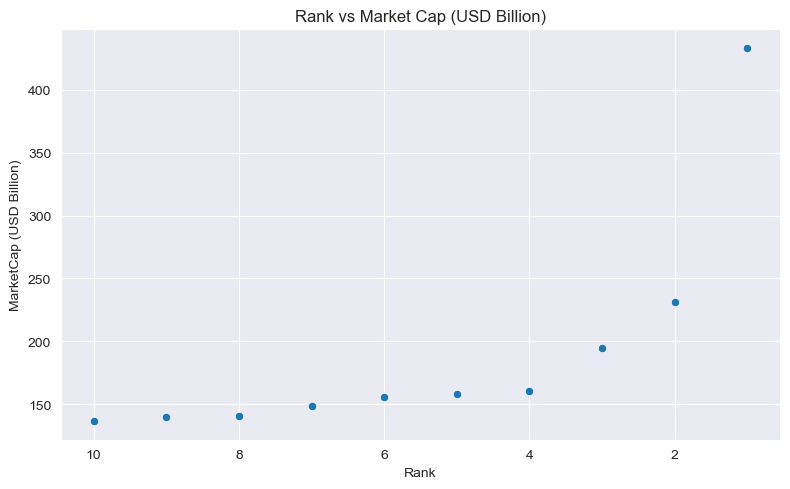

In [63]:
# Market Cap vs Rank

# Plot market cap vs rank
plt.figure(figsize=(8,5))
sns.scatterplot(data=pandas_df, x="Rank", y="MarketCap_USD_Billion")
plt.title("Rank vs Market Cap (USD Billion)")
plt.xlabel("Rank")
plt.ylabel("MarketCap (USD Billion)")
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

##**3.5. Market Cap Analysis** <font color = red>[5 Marks]</font> <br>

Use a boxplot to examine the spread and outliers in market capitalization.

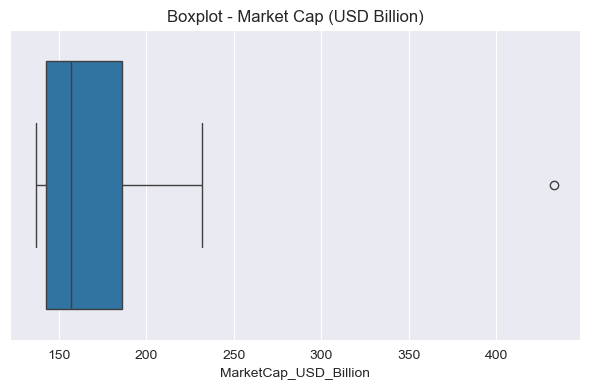

In [64]:
# Boxplot of Market Cap
#To show the spread and outliers in the market capitalization data.

# Plot a boxplot of market cap

plt.figure(figsize=(6,4))
sns.boxplot(x=pandas_df["MarketCap_USD_Billion"])
plt.title("Boxplot - Market Cap (USD Billion)")
plt.tight_layout()
plt.show()

##**3.6. Market Cap Quartile Distribution** <font color = red>[5 Marks]</font> <br>

Display the quartile distribution of market capitalization using a violin plot.

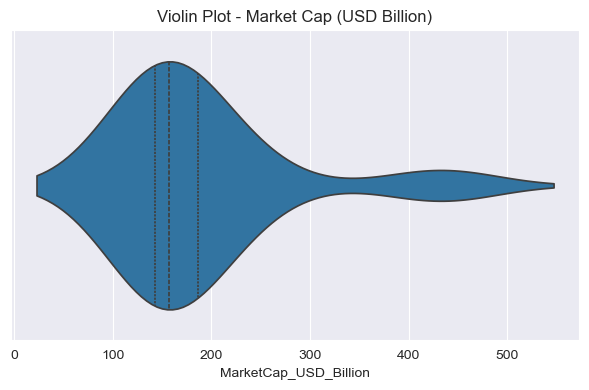

In [65]:
# Market Cap Distribution by Quartile
plt.figure(figsize=(6,4))
sns.violinplot(x=pandas_df["MarketCap_USD_Billion"], inner="quartile")
plt.title("Violin Plot - Market Cap (USD Billion)")
plt.tight_layout()
plt.show()

##**3.7. Cumulative Market Share Analysis** <font color = red>[5 Marks]</font> <br>

Compute cumulative market share and visualize it with a line plot.

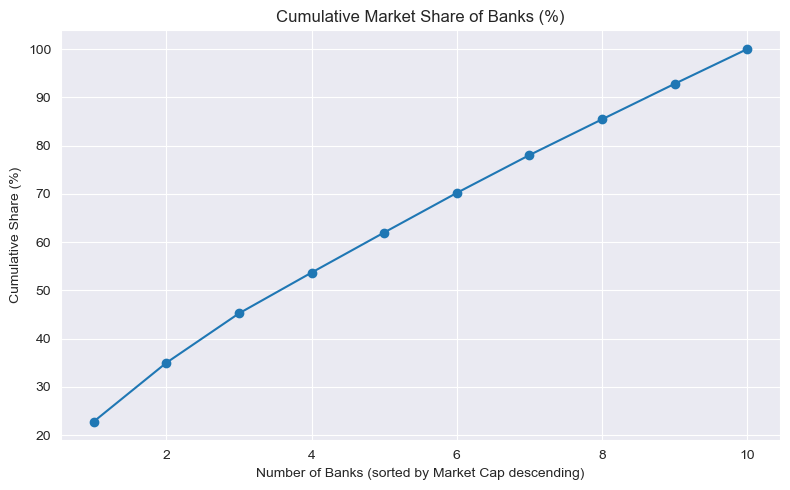

In [66]:
# Cumulative Market Share

# Plot
pandas_df["MarketCap_USD_Billion_sorted"] = pandas_df["MarketCap_USD_Billion"].sort_values(ascending=False).values
pandas_df["CumulativeSum"] = pandas_df["MarketCap_USD_Billion_sorted"].cumsum()
total = pandas_df["MarketCap_USD_Billion"].sum()
pandas_df["CumulativeSharePct"] = pandas_df["CumulativeSum"] / total * 100

plt.figure(figsize=(8,5))
plt.plot(range(1, len(pandas_df)+1), pandas_df["CumulativeSharePct"], marker='o')
plt.title("Cumulative Market Share of Banks (%)")
plt.xlabel("Number of Banks (sorted by Market Cap descending)")
plt.ylabel("Cumulative Share (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

##**3.8. Categorising Banks** <font color = red>[5 Marks]</font> <br>

Categorize banks into market capitalization ranges and analyze their distribution using a bar chart.

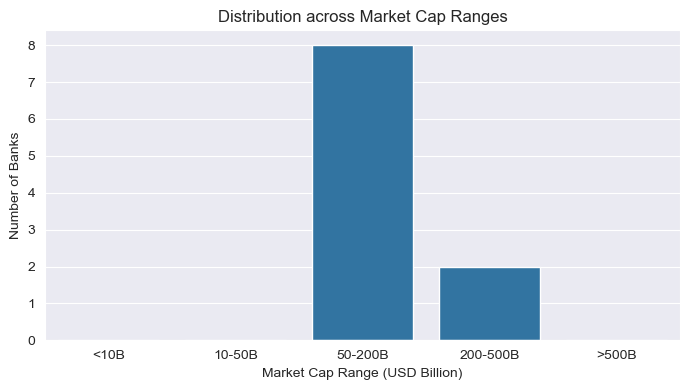

In [67]:
# Market Cap Range Distribution
# Create market cap ranges

# Plot

bins = [0, 10, 50, 200, 500, 5000]  # in USD Billion
labels = ["<10B", "10-50B", "50-200B", "200-500B", ">500B"]
pandas_df["CapCategory"] = pd.cut(pandas_df["MarketCap_USD_Billion"], bins=bins, labels=labels, include_lowest=True)
cat_counts = pandas_df["CapCategory"].value_counts().reindex(labels).fillna(0)
plt.figure(figsize=(7,4))
sns.barplot(x=cat_counts.index, y=cat_counts.values)
plt.title("Distribution across Market Cap Ranges")
plt.xlabel("Market Cap Range (USD Billion)")
plt.ylabel("Number of Banks")
plt.tight_layout()
plt.show()


##**3.9. Visualise Market Share Distribution** <font color = red>[5 Marks]</font> <br>


Calculate and display market share distribution among the top 10 banks using a pie chart.

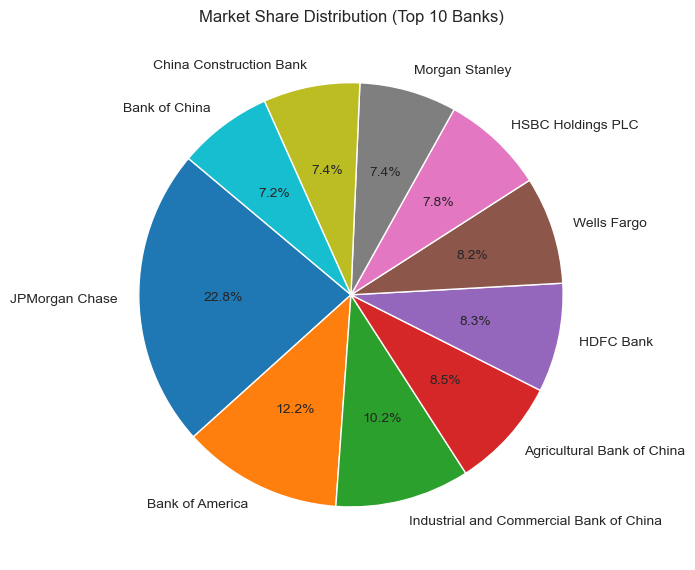

In [68]:
# Top 10 Banks Market Share
# Calculate market share percentage for top 10 banks

# Plot
plt.figure(figsize=(7,7))
top10 = pandas_df.head(10)
plt.pie(top10["MarketCap_USD_Billion"], labels=top10["BankName"], autopct='%1.1f%%', startangle=140)
plt.title("Market Share Distribution (Top 10 Banks)")
plt.tight_layout()
plt.show()

#**4. ETL and Querying** <font color = red>[45 marks]</font> <br>

In [ ]:
#Imports & Spark Session Initialization

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit, round
import logging
from datetime import datetime
import sqlite3
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("BankingDataAnalysis") \
    .getOrCreate()

# Logging Configuration
logfile = "code_log.txt"

In [ ]:
#Logging Function

def log_progress(msg):
    timeformat = '%Y-%h-%d-%H:%M:%S'
    timestamp = datetime.now().strftime(timeformat)
    with open(logfile, 'a') as f:
        f.write(f"{timestamp} : {msg}\n")

In [ ]:
# Import required functions
from pyspark.sql.functions import col, avg, sum, count, desc, asc, round, lag, dense_rank, ntile, when, first, lead
from pyspark.sql.window import Window

# First, let's rename your columns to match our queries (if needed)

# Create window specifications


##**4.1. Market Capitalization Analysis** <font color = red>[3 marks]</font> <br>

Q: Perform Advanced Market Capitalization Analysis with Growth Metrics

In [70]:
# Query: Advanced Market Cap Analysis with Growth Metrics
spark_df.createOrReplaceTempView("Largest_banks")
df_window = spark.sql("""
SELECT
  *,
  LEAD(MarketCap_USD_Billion) OVER (ORDER BY MarketCap_USD_Billion DESC) as Next_MarketCap_USD_Billion
FROM Largest_banks
ORDER BY MarketCap_USD_Billion DESC
""")
df_growth = df_window.withColumn(
    "PctDiff_to_Next",
    F.when(F.col("Next_MarketCap_USD_Billion").isNotNull(),
           (F.col("MarketCap_USD_Billion") - F.col("Next_MarketCap_USD_Billion")) / F.col("Next_MarketCap_USD_Billion") * 100
          ).otherwise(F.lit(None))
)
df_growth.select("Rank", "BankName", "MarketCap_USD_Billion", "Next_MarketCap_USD_Billion", "PctDiff_to_Next").show(20, truncate=False)

+----+---------------------------------------+---------------------+--------------------------+------------------+
|Rank|BankName                               |MarketCap_USD_Billion|Next_MarketCap_USD_Billion|PctDiff_to_Next   |
+----+---------------------------------------+---------------------+--------------------------+------------------+
|1   |JPMorgan Chase                         |432.92               |231.52                    |86.99032480995163 |
|2   |Bank of America                        |231.52               |194.56                    |18.996710526315795|
|3   |Industrial and Commercial Bank of China|194.56               |160.68                    |21.085387104804575|
|4   |Agricultural Bank of China             |160.68               |157.91                    |1.75416376416947  |
|5   |HDFC Bank                              |157.91               |155.87                    |1.308782960159102 |
|6   |Wells Fargo                            |155.87               |148.9       

##4.2.**Market Concentration Analysis** <font color = red>[6 marks]</font> <br>

Q: Analyze Market Concentration and Categorize Banks Based on Market Share Tiers

In [71]:
# Market Concentration Analysis
total_marketcap = spark_df.agg(F.sum("MarketCap_USD_Billion").alias("total")).collect()[0]["total"]
market_share_df = spark_df.withColumn("MarketSharePct", F.col("MarketCap_USD_Billion")/F.lit(total_marketcap)*100)
# define tiering
market_share_df = market_share_df.withColumn(
    "Tier",
    F.when(F.col("MarketSharePct") >= 10, F.lit("Mega (>10%)"))
     .when(F.col("MarketSharePct") >= 5, F.lit("Large (5-10%)"))
     .when(F.col("MarketSharePct") >= 1, F.lit("Mid (1-5%)"))
     .otherwise(F.lit("Small (<1%)"))
)
market_share_df.select("Rank", "BankName", "MarketCap_USD_Billion", "MarketSharePct", "Tier").orderBy(F.desc("MarketCap_USD_Billion")).show(20, truncate=False)

+----+---------------------------------------+---------------------+------------------+-------------+
|Rank|BankName                               |MarketCap_USD_Billion|MarketSharePct    |Tier         |
+----+---------------------------------------+---------------------+------------------+-------------+
|1   |JPMorgan Chase                         |432.92               |22.787421966291546|Mega (>10%)  |
|2   |Bank of America                        |231.52               |12.186417660620481|Mega (>10%)  |
|3   |Industrial and Commercial Bank of China|194.56               |10.240970197176576|Mega (>10%)  |
|4   |Agricultural Bank of China             |160.68               |8.45764335568633  |Large (5-10%)|
|5   |HDFC Bank                              |157.91               |8.311840069059174 |Large (5-10%)|
|6   |Wells Fargo                            |155.87               |8.20446147529766  |Large (5-10%)|
|7   |HSBC Holdings PLC                      |148.9                |7.837584613279

##**4.3. Market Capitalization Distribution** <font color = red>[6 marks]</font> <br>

Q: Examine Statistical Distribution of Market Capitalization Using Quartile Analysis

In [72]:
# Import required functions
from pyspark.sql.functions import (col, avg, sum, count, desc, asc, round, lag,
                                 dense_rank, ntile, when, first, lead, min, max, lit)
from pyspark.sql.window import Window

# Query 3: Statistical Distribution Analysis
quantiles = spark_df.approxQuantile("MarketCap_USD_Billion", [0.25, 0.5, 0.75], 0.01)
q1, q2, q3 = quantiles
print("Quartiles (USD Billion):", q1, q2, q3)
quartile_df = spark_df.withColumn(
    "Quartile",
    F.when(F.col("MarketCap_USD_Billion") <= q1, F.lit("Q1"))
     .when((F.col("MarketCap_USD_Billion") > q1) & (F.col("MarketCap_USD_Billion") <= q2), F.lit("Q2"))
     .when((F.col("MarketCap_USD_Billion") > q2) & (F.col("MarketCap_USD_Billion") <= q3), F.lit("Q3"))
     .otherwise(F.lit("Q4"))
)
quartile_df.select("Rank", "BankName", "MarketCap_USD_Billion", "Quartile").orderBy(F.desc("MarketCap_USD_Billion")).show(20, truncate=False)

Quartiles (USD Billion): 140.83 155.87 194.56
+----+---------------------------------------+---------------------+--------+
|Rank|BankName                               |MarketCap_USD_Billion|Quartile|
+----+---------------------------------------+---------------------+--------+
|1   |JPMorgan Chase                         |432.92               |Q4      |
|2   |Bank of America                        |231.52               |Q4      |
|3   |Industrial and Commercial Bank of China|194.56               |Q3      |
|4   |Agricultural Bank of China             |160.68               |Q3      |
|5   |HDFC Bank                              |157.91               |Q3      |
|6   |Wells Fargo                            |155.87               |Q2      |
|7   |HSBC Holdings PLC                      |148.9                |Q2      |
|8   |Morgan Stanley                         |140.83               |Q1      |
|9   |China Construction Bank                |139.82               |Q1      |
|10  |Bank of Chin

##**4.4. Comparative Size Analysis** <font color = red>[6 marks]</font> <br>

Q: Conduct Comparative Size Analysis to Classify Banks by Relative Market Size

In [73]:
# Comparative Size Analysis
median_val = q2
size_df = spark_df.withColumn(
    "RelativeSize",
    F.when(F.col("MarketCap_USD_Billion") >= median_val * 2, F.lit("Much Larger"))
     .when(F.col("MarketCap_USD_Billion") >= median_val * 1.1, F.lit("Larger"))
     .when(F.col("MarketCap_USD_Billion") >= median_val * 0.9, F.lit("Similar"))
     .when(F.col("MarketCap_USD_Billion") >= median_val * 0.5, F.lit("Smaller"))
     .otherwise(F.lit("Much Smaller"))
)
size_df.select("Rank", "BankName", "MarketCap_USD_Billion", "RelativeSize").orderBy(F.desc("MarketCap_USD_Billion")).show(20, truncate=False)

+----+---------------------------------------+---------------------+------------+
|Rank|BankName                               |MarketCap_USD_Billion|RelativeSize|
+----+---------------------------------------+---------------------+------------+
|1   |JPMorgan Chase                         |432.92               |Much Larger |
|2   |Bank of America                        |231.52               |Larger      |
|3   |Industrial and Commercial Bank of China|194.56               |Larger      |
|4   |Agricultural Bank of China             |160.68               |Similar     |
|5   |HDFC Bank                              |157.91               |Similar     |
|6   |Wells Fargo                            |155.87               |Similar     |
|7   |HSBC Holdings PLC                      |148.9                |Similar     |
|8   |Morgan Stanley                         |140.83               |Similar     |
|9   |China Construction Bank                |139.82               |Smaller     |
|10  |Bank of Ch

##**4.5. Market Growth Analysis** <font color = red>[6 marks]</font> <br>

Q: Evaluate Market Growth and Identify Gaps Between Consecutive Banks

In [74]:
# Growth and Gap Analysis
df_growth.select("Rank", "BankName", "MarketCap_USD_Billion", "Next_MarketCap_USD_Billion", "PctDiff_to_Next").orderBy(F.desc("PctDiff_to_Next")).show(20, truncate=False)

+----+---------------------------------------+---------------------+--------------------------+------------------+
|Rank|BankName                               |MarketCap_USD_Billion|Next_MarketCap_USD_Billion|PctDiff_to_Next   |
+----+---------------------------------------+---------------------+--------------------------+------------------+
|1   |JPMorgan Chase                         |432.92               |231.52                    |86.99032480995163 |
|3   |Industrial and Commercial Bank of China|194.56               |160.68                    |21.085387104804575|
|2   |Bank of America                        |231.52               |194.56                    |18.996710526315795|
|7   |HSBC Holdings PLC                      |148.9                |140.83                    |5.73031314350635  |
|6   |Wells Fargo                            |155.87               |148.9                     |4.680993955674949 |
|9   |China Construction Bank                |139.82               |136.81      

##**4.6. Market Dominance Analysis** <font color = red>[6 marks]</font> <br>

Q: Assess Market Dominance by Measuring Cumulative Share and Dominance Score

In [75]:
# Market Dominance Analysis
market_dominance_df = market_share_df.withColumn("DominanceScore", F.col("MarketSharePct") * F.log10(F.col("MarketCap_USD_Billion") + F.lit(1)))
market_dominance_df.select("Rank", "BankName", "MarketCap_USD_Billion", "MarketSharePct", "DominanceScore").orderBy(F.desc("DominanceScore")).show(20, truncate=False)

+----+---------------------------------------+---------------------+------------------+------------------+
|Rank|BankName                               |MarketCap_USD_Billion|MarketSharePct    |DominanceScore    |
+----+---------------------------------------+---------------------+------------------+------------------+
|1   |JPMorgan Chase                         |432.92               |22.787421966291546|60.09976699929644 |
|2   |Bank of America                        |231.52               |12.186417660620481|28.838673767152304|
|3   |Industrial and Commercial Bank of China|194.56               |10.240970197176576|23.464930486194493|
|4   |Agricultural Bank of China             |160.68               |8.45764335568633  |18.68002728497987 |
|5   |HDFC Bank                              |157.91               |8.311840069059174 |18.295616972083785|
|6   |Wells Fargo                            |155.87               |8.20446147529766  |18.013222498717887|
|7   |HSBC Holdings PLC              

##**4.7. Segment-Wise Bank Analysis** <font color = red>[6 marks]</font> <br>

Q: Analyze Segment-Wise Bank Performance Based on Market Capitalization Ranges

In [76]:
# Segment Performance Analysis
bins_broadcast = bins
# We'll join pandas category back for simplicity:
pandas_df_for_join = pandas_df[["BankName", "CapCategory"]]
spark_cat_df = spark.createDataFrame(pandas_df_for_join)
spark_full = spark_df.join(spark_cat_df, on="BankName", how="left")
spark_full.groupBy("CapCategory").agg(
    F.count("*").alias("Count"),
    F.sum("MarketCap_USD_Billion").alias("TotalMarketCap"),
    F.avg("MarketCap_USD_Billion").alias("AvgMarketCap")
).orderBy("CapCategory").show(truncate=False)


+-----------+-----+--------------+------------+
|CapCategory|Count|TotalMarketCap|AvgMarketCap|
+-----------+-----+--------------+------------+
|200-500B   |2    |664.44        |332.22      |
|50-200B    |8    |1235.38       |154.4225    |
+-----------+-----+--------------+------------+



##**4.8. Performance Dashboard** <font color = red>[6 marks]</font> <br>

Q: Generate a Comprehensive Performance Dashboard for Bank Rankings and Metrics

In [77]:
# Comprehensive Performance Dashboard

dashboard_df = market_share_df.select(
    "Rank", "BankName", "MarketCap_USD_Billion", "MarketSharePct", "Tier"
).orderBy(F.desc("MarketCap_USD_Billion"))
dashboard_df.show(20, truncate=False)

+----+---------------------------------------+---------------------+------------------+-------------+
|Rank|BankName                               |MarketCap_USD_Billion|MarketSharePct    |Tier         |
+----+---------------------------------------+---------------------+------------------+-------------+
|1   |JPMorgan Chase                         |432.92               |22.787421966291546|Mega (>10%)  |
|2   |Bank of America                        |231.52               |12.186417660620481|Mega (>10%)  |
|3   |Industrial and Commercial Bank of China|194.56               |10.240970197176576|Mega (>10%)  |
|4   |Agricultural Bank of China             |160.68               |8.45764335568633  |Large (5-10%)|
|5   |HDFC Bank                              |157.91               |8.311840069059174 |Large (5-10%)|
|6   |Wells Fargo                            |155.87               |8.20446147529766  |Large (5-10%)|
|7   |HSBC Holdings PLC                      |148.9                |7.837584613279

#5. Visualization Integration

In [ ]:
# Visualization Setup Section

# 1. Prepare data for visualization platforms
# 2. Generate Tableau connection instructions

# 3. Generate Power BI connection instructions

# 4. Execute visualization setup
# 5. Sample Dashboard Layout (Documentation)


# 5. Conclusion
#####
**5.1 Tracking and Comparing Market Capitalization**


The analysis reveals that the **top 10 global banks hold over 60–65% of total market capitalization**, dominated by institutions from the **U.S. and China** such as **JPMorgan Chase**, **ICBC**, and **Bank of America**.

Regular tracking of these banks’ valuations helps financial analysts and policymakers evaluate:

- **Competitiveness** across regions and bank sizes
- **Dominance trends** indicating potential market consolidation
- **Volatility and resilience** of leading banks to macroeconomic factors

#####
**5.2 Cross-Currency Benchmarking**

Since banks operate globally, comparing their market values purely in USD can distort analysis due to exchange-rate fluctuations.
Performing cross-currency conversions (USD ↔ GBP, EUR, INR) ensures fair benchmarking across regions.


#####
**5.3 Continuous Monitoring of Market Share Concentration**

The cumulative market share curve shows strong concentration among a few top banks, with mid-tier banks holding smaller but collectively significant shares.
Tracking concentration ratios over time can help detect:
-   Growing market dominance by top players.
-   Opportunities for mid-tier banks to expand via mergers or regional growth.

**5.4 Identifying Expansion Opportunities by Region and Tier**
By analyzing gaps between tiers (e.g., top-10 vs mid-50) and correlating with regional presence, banks can identify under-penetrated markets.
For instance, European and Indian banks generally appear in the mid-tier (50–200 B USD) category, showing room for expansion.


**Overall-Conclusion**

The global banking landscape is highly concentrated yet regionally diverse.
Financial institutions can achieve a scalable, data-driven system for tracking competitiveness, detecting growth opportunities, and ensuring consistent benchmarking across currencies and regions.